<a href="https://colab.research.google.com/github/wagner1986/python-computer-vision/blob/master/ilumination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ilumination Opencv 

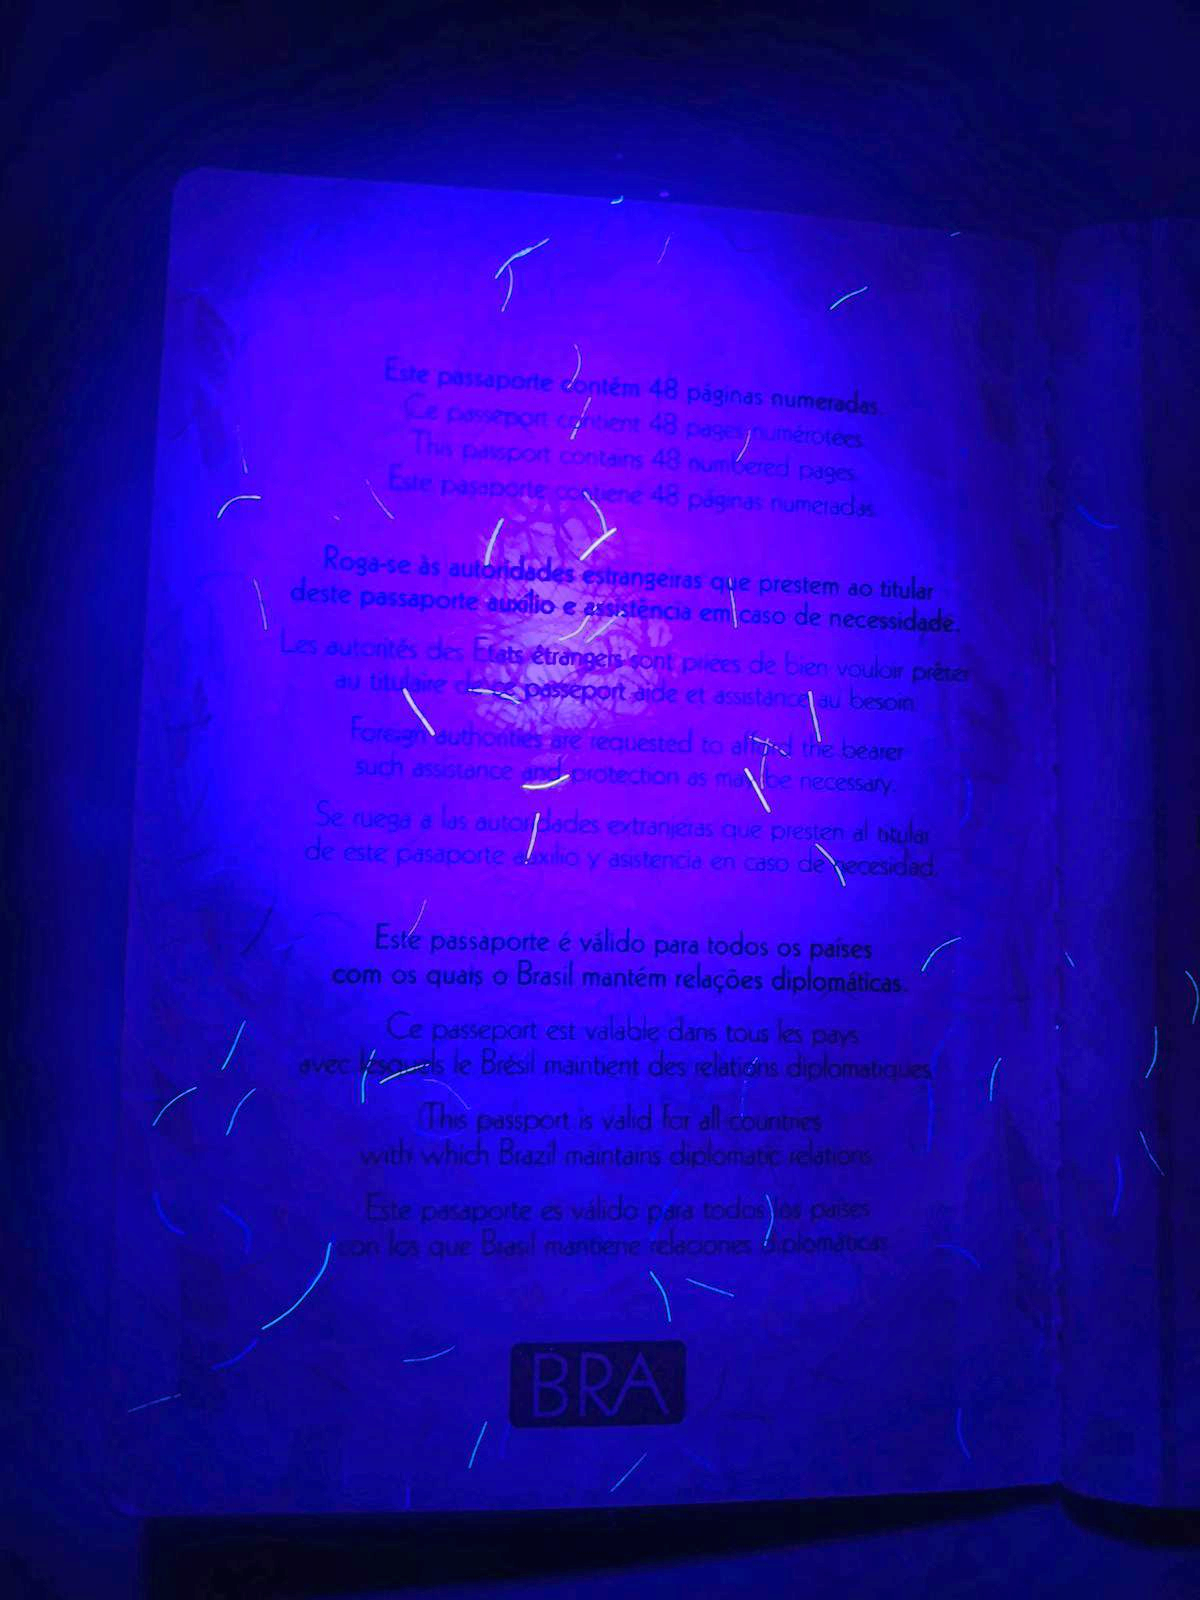

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('pag0-a.jpeg')
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
b = clahe.apply(image[:, :, 0])
g = clahe.apply(image[:, :, 1])
r = clahe.apply(image[:, :, 2])
equalized = np.dstack((b, g, r))
cv2_imshow(equalized)

## remove the lightning

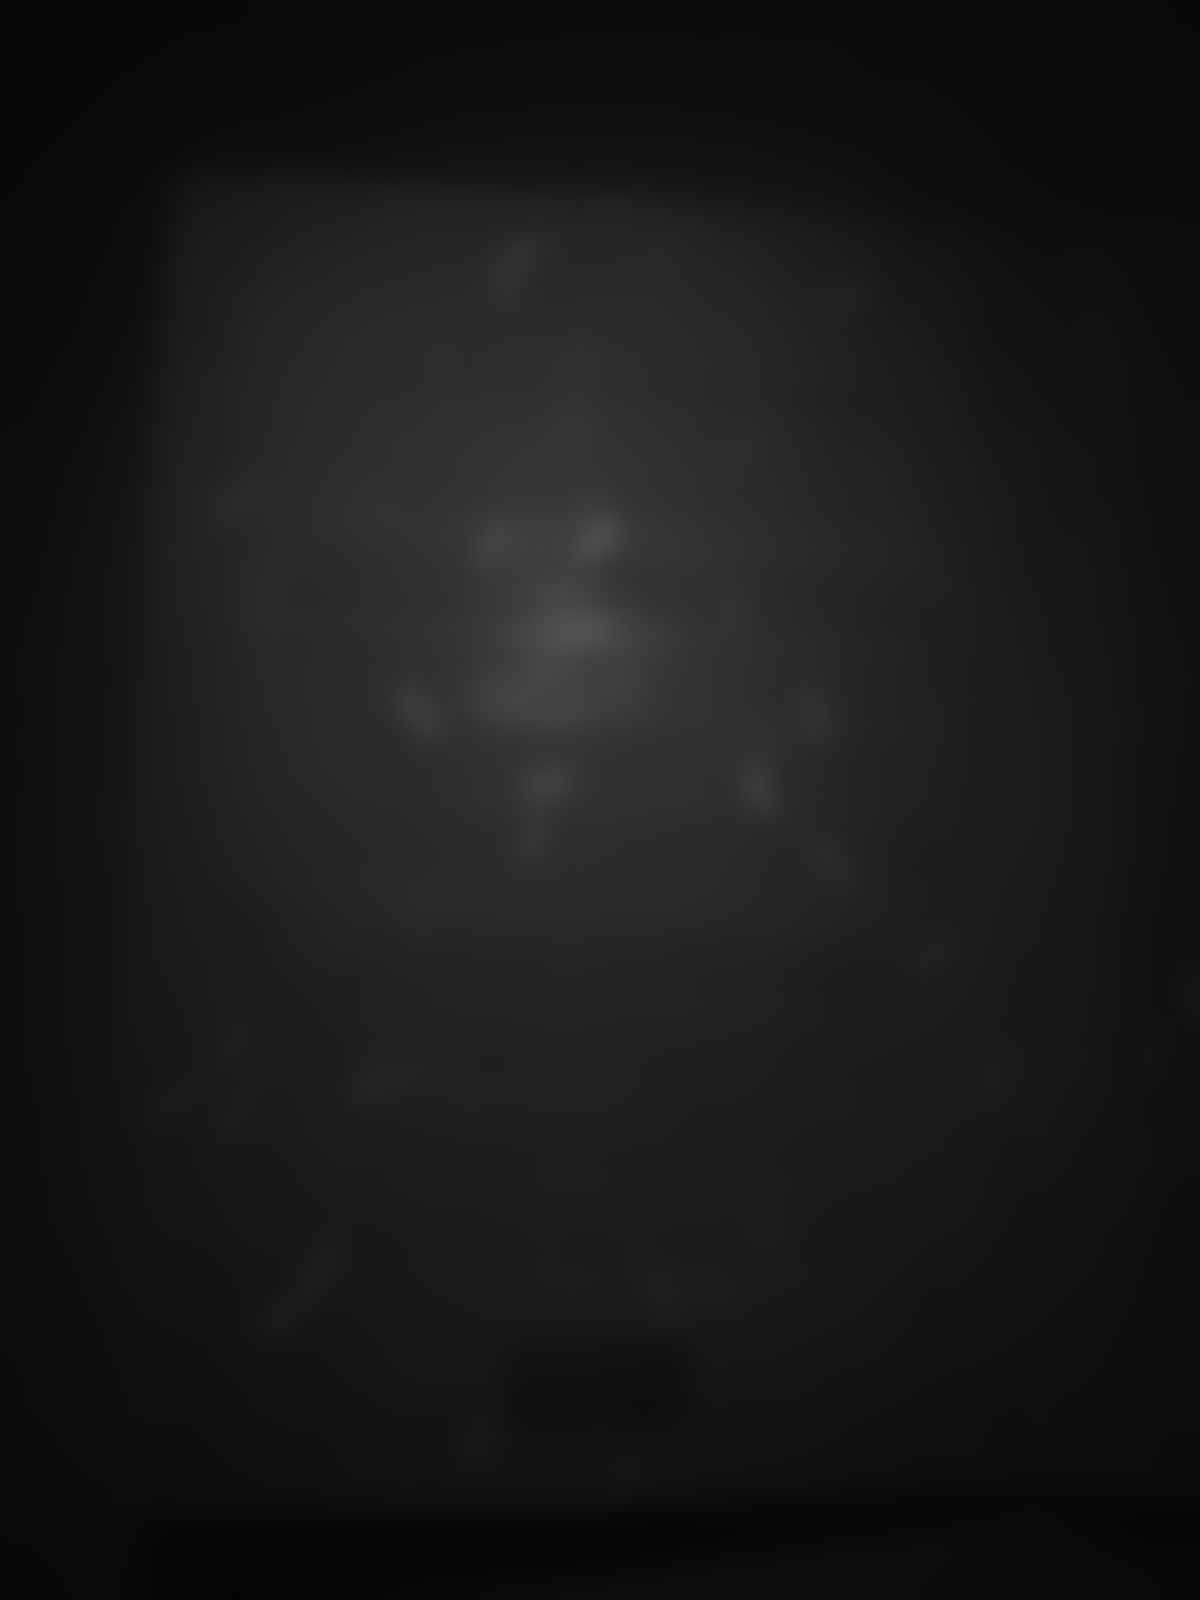

In [ ]:
import cv2
import imutils
import numpy as np
from skimage import measure
from imutils import contours

img = cv2.imread('pag0-a.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (95, 95), 0)
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)
labels = measure.label(thresh, connectivity=2, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")
cv2_imshow(blurred)


In [ ]:
for label in np.unique(labels):
    if label == 0:
        continue
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
    if numPixels > 300:
        mask = cv2.add(mask, labelMask)

    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = contours.sort_contours(cnts)[0]
    for (i, c) in enumerate(cnts):
        (x, y, w, h) = cv2.boundingRect(c)
        ((cX, cY), radius) = cv2.minEnclosingCircle(c)
        cv2.circle(img, (int(cX), int(cY)), int(radius),
                   (0, 0, 255), 3)
        cv2.putText(img, "#{}".format(i + 1), (x, y - 15),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
    cv2.imwrite('remove.jpg',img)